In [2]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import molli as ml  # Import your molecular library handler

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
mlib_path = '4_DB_OPT_Sterimol.mlib'

df_reaction_data = pd.read_excel(file_path)

# Preserve the 'Reactant ID' and '_Alkene_Type' for labeling
labels = df_reaction_data['Reactant ID']
alkene_types = df_reaction_data['_Alkene_Type']

# Drop the irrelevant and non-numeric features
df = df_reaction_data.drop(columns=['Rxn ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG', '_Alkene_Type', 'Reactant ID', 'Catalyst ID'])

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df_imputed)

# Transform the data using the fitted scaler
df_scaled = pd.DataFrame(scaler.transform(df_imputed), columns=df_imputed.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Apply PCA to the dataset
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_selected)

# Apply K-means clustering on the PCA results
n_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_results)

pca_df = pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Choose a cluster (for example, cluster 3)
chosen_cluster = 1
cluster_data = df_selected[cluster_labels == chosen_cluster]

cluster_data_pca = pca.transform(cluster_data)
centroid = kmeans.cluster_centers_[chosen_cluster].reshape(1, -1)
distances = cdist(cluster_data_pca, centroid, metric='euclidean')
closest_indices = distances.flatten().argsort()[:10]
closest_reactant_ids = df_reaction_data.iloc[closest_indices]['Reactant ID'].tolist()

ml.visual.configure(bgcolor='white')

for reactant_id in closest_reactant_ids:
    command = f"%mlib_view {mlib_path} {reactant_id}"
    print(command)  # Print the command for verification


%mlib_view 4_DB_OPT_Sterimol.mlib react_1435
%mlib_view 4_DB_OPT_Sterimol.mlib react_723
%mlib_view 4_DB_OPT_Sterimol.mlib react_854
%mlib_view 4_DB_OPT_Sterimol.mlib react_636
%mlib_view 4_DB_OPT_Sterimol.mlib react_1330
%mlib_view 4_DB_OPT_Sterimol.mlib react_2396
%mlib_view 4_DB_OPT_Sterimol.mlib react_1319
%mlib_view 4_DB_OPT_Sterimol.mlib react_1046
%mlib_view 4_DB_OPT_Sterimol.mlib react_1457
%mlib_view 4_DB_OPT_Sterimol.mlib react_656


In [3]:
import molli as ml
ml.visual.configure(bgcolor='white')

%mlib_view 4_DB_OPT_Sterimol.mlib react_1435
%mlib_view 4_DB_OPT_Sterimol.mlib react_723
%mlib_view 4_DB_OPT_Sterimol.mlib react_854
%mlib_view 4_DB_OPT_Sterimol.mlib react_636
%mlib_view 4_DB_OPT_Sterimol.mlib react_1330
%mlib_view 4_DB_OPT_Sterimol.mlib react_2396
%mlib_view 4_DB_OPT_Sterimol.mlib react_1319
%mlib_view 4_DB_OPT_Sterimol.mlib react_1046
%mlib_view 4_DB_OPT_Sterimol.mlib react_1457
%mlib_view 4_DB_OPT_Sterimol.mlib react_656


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

%mlib_view 4_DB_OPT_Sterimol.mlib react_32
%mlib_view 4_DB_OPT_Sterimol.mlib react_1328

      Rxn ID Reactant ID
147     2494  react_2027
1063   11759   react_638
1329   12001  react_2051
1464   12229  react_1742
1909   10869   react_474


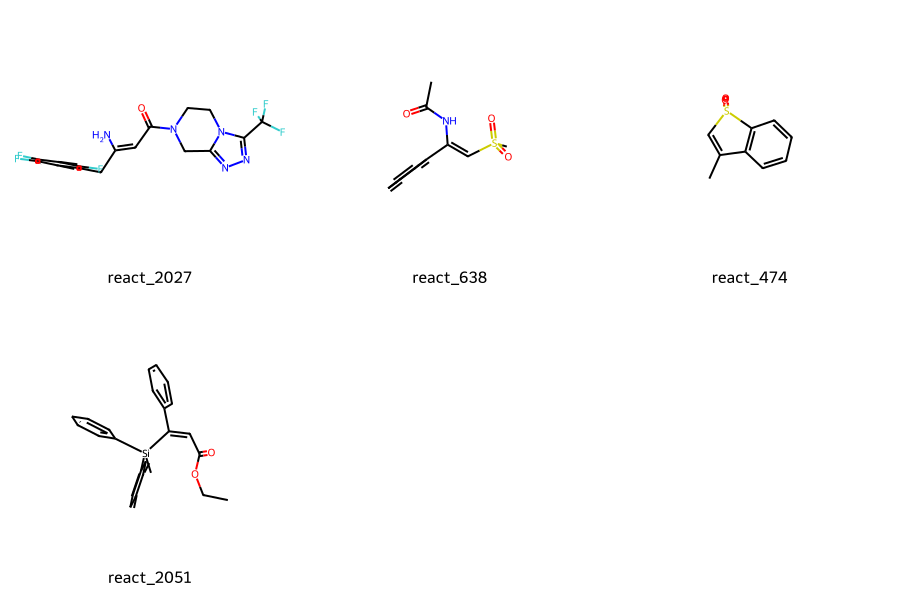

In [4]:
import pandas as pd
from molli.external.rdkit import to_rdmol
from rdkit.Chem import Draw
from IPython.display import display  # For displaying the image in a Jupyter notebook

# Load the original dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# List of Reaction IDs to filter
# reaction_ids = [8700,12039,10853,11661,4970]

reaction_ids = [2494,11759,12229,12001,10869,11759]

# Filter the DataFrame to get rows with the specified Reaction IDs
filtered_df = df[df['Rxn ID'].isin(reaction_ids)]

# Extract the Reactant IDs corresponding to those Reaction IDs
reactant_ids = filtered_df[['Rxn ID', 'Reactant ID']]

print(reactant_ids)


# %mlib_view 4_DB_OPT_Sterimol.mlib react_892
# %mlib_view 4_DB_OPT_Sterimol.mlib react_222
# %mlib_view 4_DB_OPT_Sterimol.mlib react_1488
# %mlib_view 4_DB_OPT_Sterimol.mlib react_2051


# reactant_ids = ['react_892', 'react_222', 'react_853', 'react_1822', 'react_2215','react_2473','react_1432']
reactant_ids = ['react_2027','react_638','react_474','react_2051']
# Load, convert, and store the RDKit molecules
mols = []
mlib = ml.MoleculeLibrary('4_DB_OPT_Sterimol.mlib')
with mlib.reading():
    for reactant_id in reactant_ids:
        mol = mlib[reactant_id]
        rdmol = to_rdmol(mol)
        mols.append(rdmol)

# Visualize the molecules in a grid
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300), legends=reactant_ids)
display(img)

CC1=CS(=O)(=O)c2ccccc21
N/C(=C\C(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)c(F)cc1F
CC(=O)N/C(=C\S(C)(=O)=O)c1ccccc1
CCOC(=O)/C=C(/c1ccccc1)[Si](C)(c1ccccc1)c1ccccc1
[<rdkit.Chem.rdchem.Mol object at 0x1668833e0>, <rdkit.Chem.rdchem.Mol object at 0x166d04040>, <rdkit.Chem.rdchem.Mol object at 0x166d040b0>, <rdkit.Chem.rdchem.Mol object at 0x166d04120>]


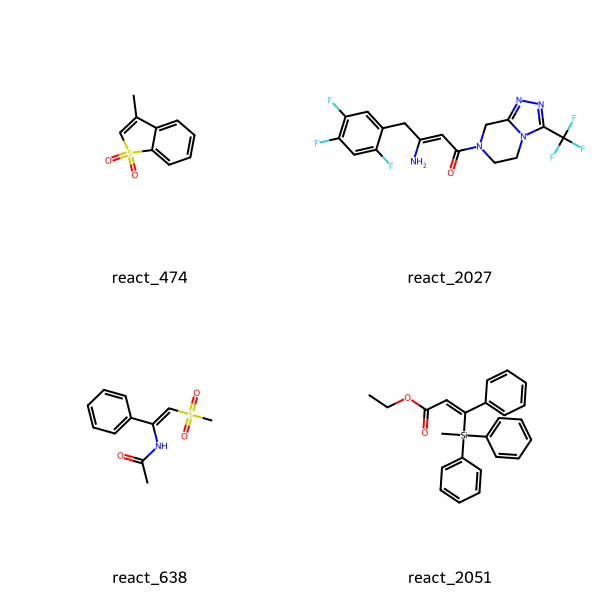

In [5]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Load the Excel file
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/alkene/fixed_react_map_aho_dataset.xlsx'
df = pd.read_excel(file_path)

# List of reactant IDs to filter
reactant_ids = ['react_2027', 'react_638', 'react_474', 'react_2051']

# Filter the DataFrame to get rows with the specified Reactant IDs
filtered_df = df[df['Reactant ID'].isin(reactant_ids)]

# Extract unique SMILES strings corresponding to the reactant IDs
unique_smiles_df = filtered_df[['Reactant ID', 'Reactant SMILES']].drop_duplicates(subset='Reactant SMILES')

# Convert SMILES strings to RDKit Mol objects, filtering out any invalid ones
mols = []
valid_legends = []
for index, row in unique_smiles_df.iterrows():
    mol = Chem.MolFromSmiles(row['Reactant SMILES'])
    print(row['Reactant SMILES'])
    if mol is not None:  # Only add if the SMILES was valid
        mols.append(mol)
        valid_legends.append(row['Reactant ID'])

# Visualize the molecules in a grid
print(mols)
if mols:  # Ensure there are molecules to display
    img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=valid_legends)
    display(img)
else:
    print("No valid molecules to display.")


In [6]:
import molli as ml
from rdkit.Chem import Draw
import molli.external.rdkit

# Define a function to load and convert a molecule from the library
def load_and_convert_to_rdmol(mlib, molecule_id):
    with mlib.reading():
        mol = mlib[molecule_id]

    rdmol = ml.to_rdmol(mol)
    return rdmol

# List of molecule IDs to load and visualize
# Path to the molecule library
library_path = '4_DB_OPT_Sterimol.mlib'

# Load the molecule library
mlib = ml.MoleculeLibrary(library_path)

# List of molecule IDs to load and visualize
molecule_ids = ['react_892', 'react_222']

# Load and convert the molecules
mols = [load_and_convert_to_rdmol(mlib, mol_id) for mol_id in molecule_ids]

# Visualize the molecules
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=molecule_ids)
img.show()


AttributeError: module 'molli' has no attribute 'to_rdmol'